In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# Check if the file exists
file_path = 'copying_data.xlsx'
if os.path.exists(file_path):
	df = pd.read_excel(file_path)
else:
	print(f"Error: The file '{file_path}' does not exist. Please check the file path.")

FileNotFoundError: [Errno 2] No such file or directory: 'copying_data.xlsx'

In [ ]:
df.drop(columns=['ranking of movie_x000D_\n'], inplace=True)

In [ ]:
df.columns = df.columns.str.replace('_x000D_\n', ' ').str.replace('\n', '').str.replace('_', ' ')
df.head()

,movie name,Year,certificate,runtime,genre,RATING,metascore,Director,votes,GROSS COLLECTION
0,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Frank Darabont,2603314,$28.34M
1,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1798731,$134.97M
2,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2574810,$534.86M
3,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,1787701,$377.85M
4,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,Steven Spielberg,1323776,$96.90M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie name         1000 non-null   object 
 1   Year               1000 non-null   object 
 2   certificate        995 non-null    object 
 3   runtime            1000 non-null   object 
 4   genre              1000 non-null   object 
 5   RATING             1000 non-null   float64
 6   metascore          837 non-null    float64
 7   Director           1000 non-null   object 
 8   votes              1000 non-null   int64  
 9   GROSS COLLECTION   820 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [ ]:
df.columns = df.columns.str.strip()
df["runtime"] = df["runtime"].str.replace(' min', '').astype(int)
df["GROSS COLLECTION"] = df["GROSS COLLECTION"].str.replace('$', '').str.replace('M', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie name        1000 non-null   object 
 1   Year              1000 non-null   object 
 2   certificate       995 non-null    object 
 3   runtime           1000 non-null   int64  
 4   genre             1000 non-null   object 
 5   RATING            1000 non-null   float64
 6   metascore         837 non-null    float64
 7   Director          1000 non-null   object 
 8   votes             1000 non-null   int64  
 9   GROSS COLLECTION  820 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [ ]:
df["Year"] = df["Year"].astype(str).str.replace('-', '')

In [ ]:
df.rename(columns={'GROSS COLLECTION': 'Gross Collection (Million $)', 'runtime': 'Runtime (Minutes)'}, inplace=True)
df.head()

,movie name,Year,certificate,Runtime (Minutes),genre,RATING,metascore,Director,votes,Gross Collection (Million $)
0,The Shawshank Redemption,1994,15,142,Drama,9.3,81.0,Frank Darabont,2603314,28.34
1,The Godfather,1972,X,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1798731,134.97
2,The Dark Knight,2008,12A,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2574810,534.86
3,The Lord of the Rings: The Return of the King,2003,12A,201,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,1787701,377.85
4,Schindler's List,1993,15,195,"Biography, Drama, History",9.0,94.0,Steven Spielberg,1323776,96.90


In [ ]:
df.isnull().sum()

movie name                        0
Year                              0
certificate                       5
Runtime (Minutes)                 0
genre                             0
RATING                            0
metascore                       163
Director                          0
votes                             0
Gross Collection (Million $)    180
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

movie name                      0
Year                            0
certificate                     0
Runtime (Minutes)               0
genre                           0
RATING                          0
metascore                       0
Director                        0
votes                           0
Gross Collection (Million $)    0
dtype: int64

In [ ]:
# Extract numeric part from the 'Year' column and convert to integers
df["Year"] = df["Year"].str.replace(r'\D', '', regex=True).astype(int)


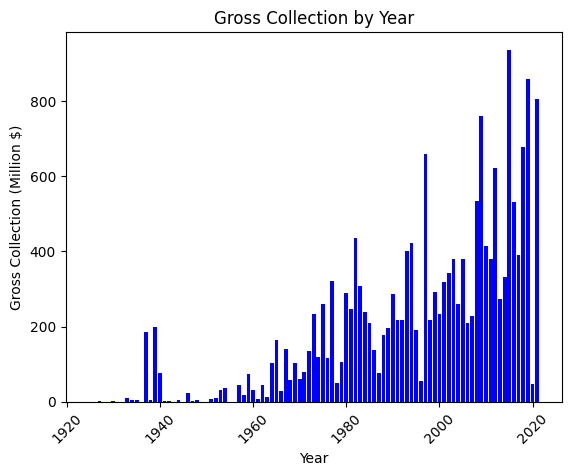

In [ ]:
fig, ax = plt.subplots()
ax.bar(df['Year'], df['Gross Collection (Million $)'], color='blue')
ax.set_title('Gross Collection by Year')    
ax.set_xlabel('Year')
ax.set_ylabel('Gross Collection (Million $)')   
plt.xticks(rotation=45)
plt.show()

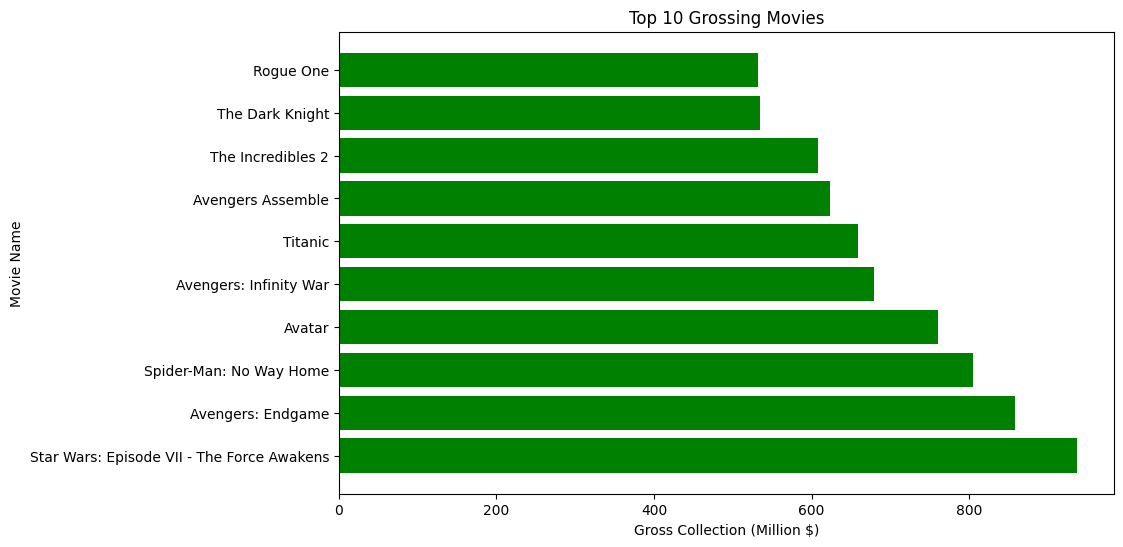

In [ ]:
# top 10 grossing movies
top_10_grossing_movies = df.nlargest(10, 'Gross Collection (Million $)')
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_grossing_movies['movie name'], top_10_grossing_movies['Gross Collection (Million $)'], color='green')
ax.set_title('Top 10 Grossing Movies')
ax.set_xlabel('Gross Collection (Million $)')
ax.set_ylabel('Movie Name')
plt.show()



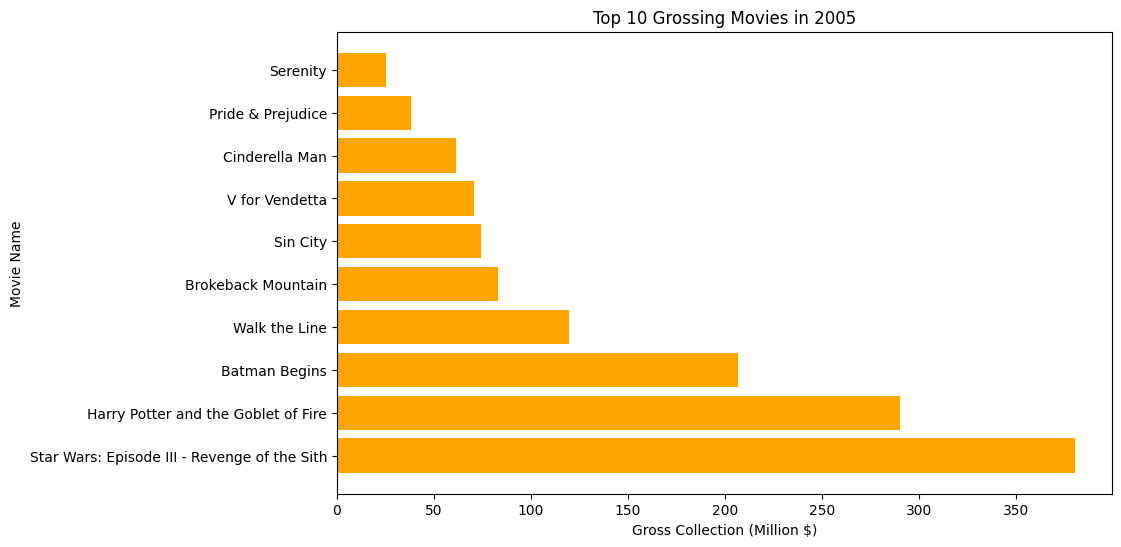

In [ ]:
# top 10 grossing movies in 2005    
top_10_grossing_movies_2005 = df[df['Year'] == 2005].nlargest(10, 'Gross Collection (Million $)')
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_grossing_movies_2005['movie name'], top_10_grossing_movies_2005['Gross Collection (Million $)'], color='orange')
ax.set_title('Top 10 Grossing Movies in 2005')  
ax.set_xlabel('Gross Collection (Million $)')
ax.set_ylabel('Movie Name')
plt.show()

In [ ]:
df["certificate"].unique()

array([15, 'X', '12A', 'U', 18, 'PG', 12, 'A', 'AA', 'R', 'Rejected',
       'UA'], dtype=object)

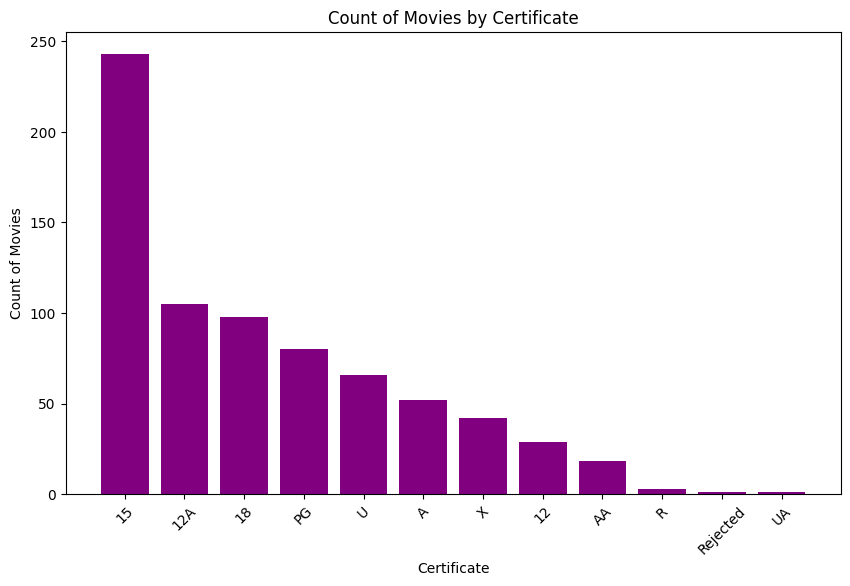

In [ ]:
count=df["certificate"].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(count.index.astype(str), count.values, color='purple')
ax.set_title('Count of Movies by Certificate')      
ax.set_xlabel('Certificate')
ax.set_ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.show()

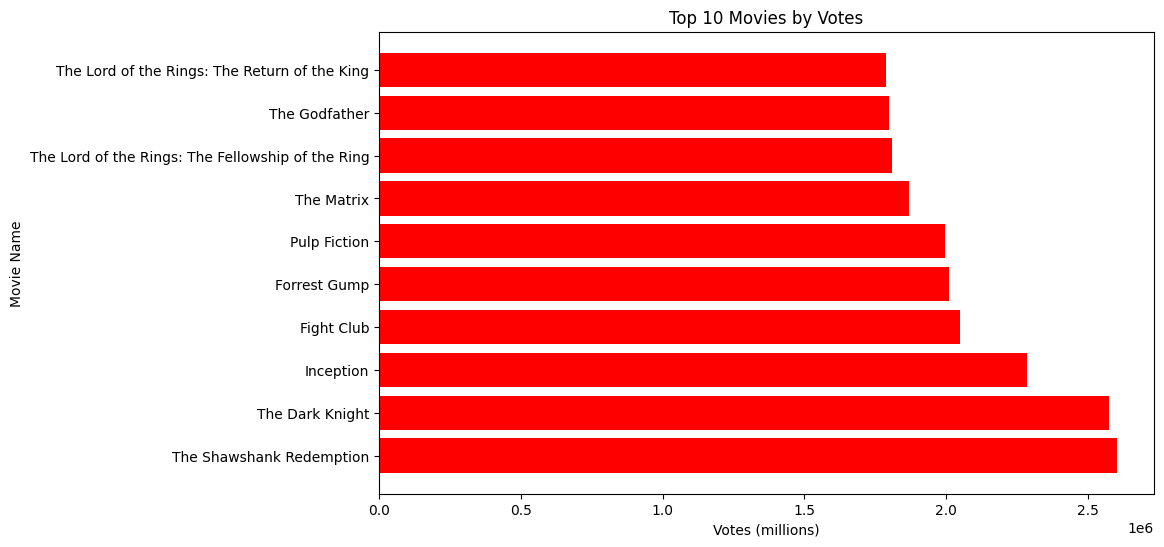

In [ ]:
most_votes=df.nlargest(10, "votes").sort_values(by="votes", ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(most_votes['movie name'], most_votes['votes'], color='red')
ax.set_title('Top 10 Movies by Votes')
ax.set_xlabel('Votes (millions)')
ax.set_ylabel('Movie Name')
plt.show()

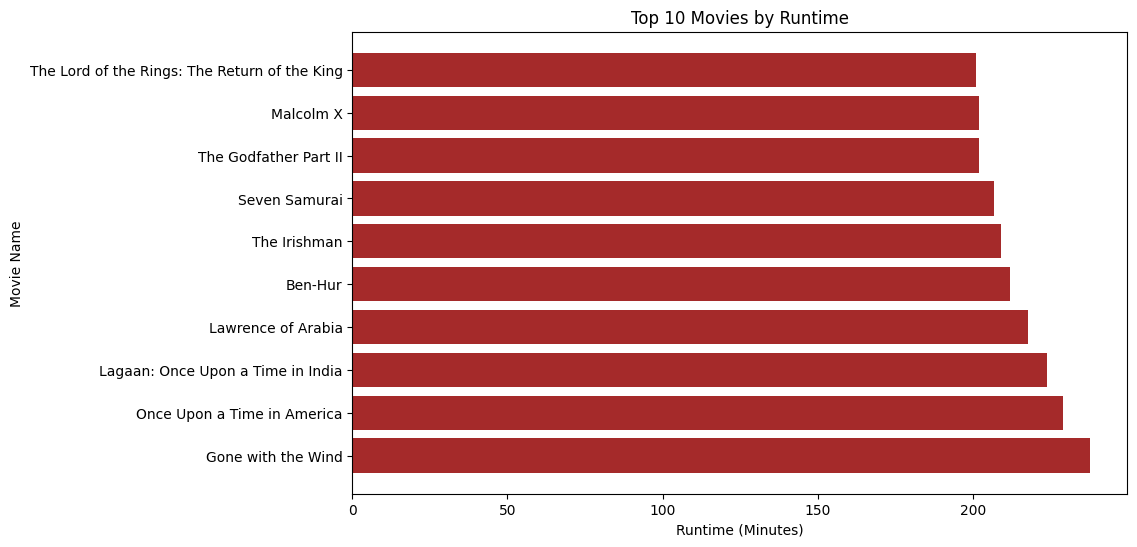

In [ ]:
longest_runtime_movies = df.nlargest(10, "Runtime (Minutes)").sort_values(by="Runtime (Minutes)", ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(longest_runtime_movies['movie name'], longest_runtime_movies['Runtime (Minutes)'], color='brown')
ax.set_title('Top 10 Movies by Runtime')
ax.set_xlabel('Runtime (Minutes)')
ax.set_ylabel('Movie Name') 
plt.show()

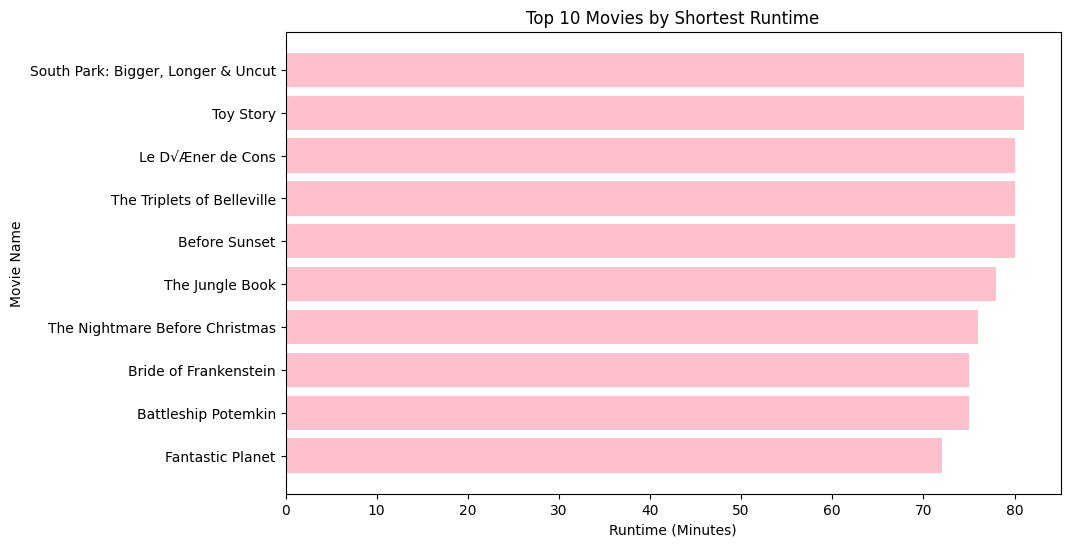

In [ ]:
shortest_movies =df.nsmallest(10, "Runtime (Minutes)").sort_values(by="Runtime (Minutes)", ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(shortest_movies['movie name'], shortest_movies['Runtime (Minutes)'], color='pink')
ax.set_title('Top 10 Movies by Shortest Runtime')   
ax.set_xlabel('Runtime (Minutes)')
ax.set_ylabel('Movie Name')
plt.show()

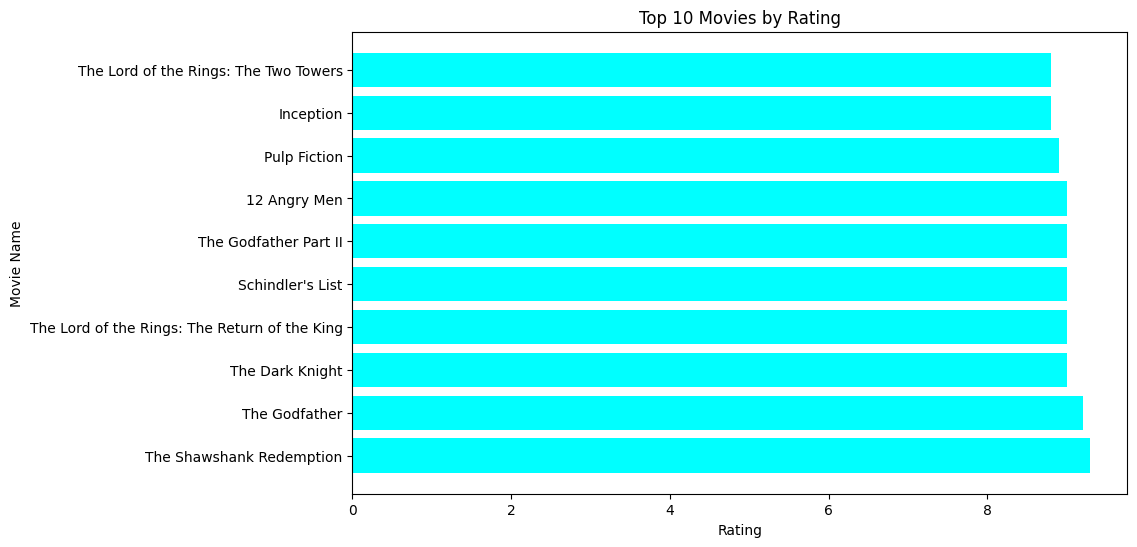

In [ ]:
# top 10 movies by rating
top_10_movies_by_rating = df.nlargest(10, "RATING").sort_values(by="RATING", ascending=False)   
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_movies_by_rating['movie name'], top_10_movies_by_rating['RATING'], color='cyan')
ax.set_title('Top 10 Movies by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Movie Name')
plt.show()

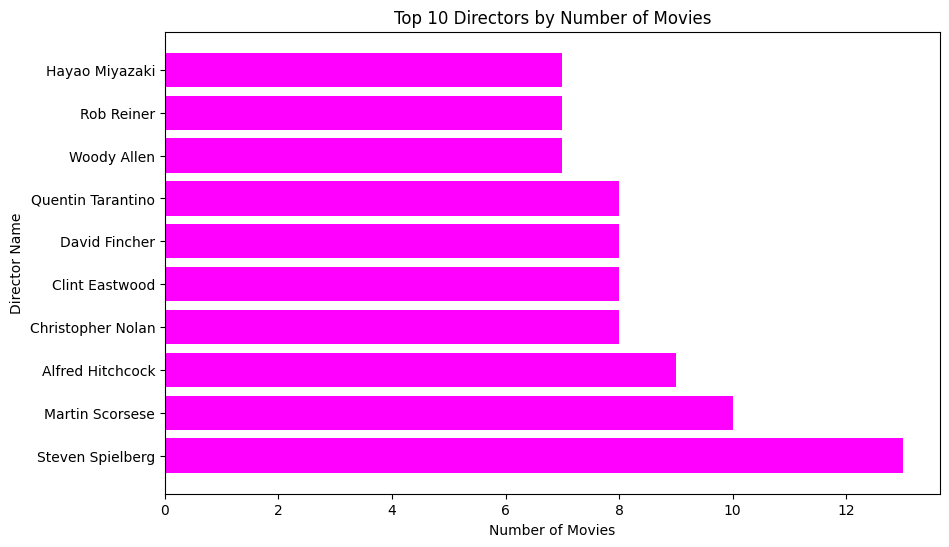

In [ ]:
# top directors by number of movies
top_directors = df["Director"].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_directors.index, top_directors.values, color='magenta')
ax.set_title('Top 10 Directors by Number of Movies')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Director Name')
plt.show()

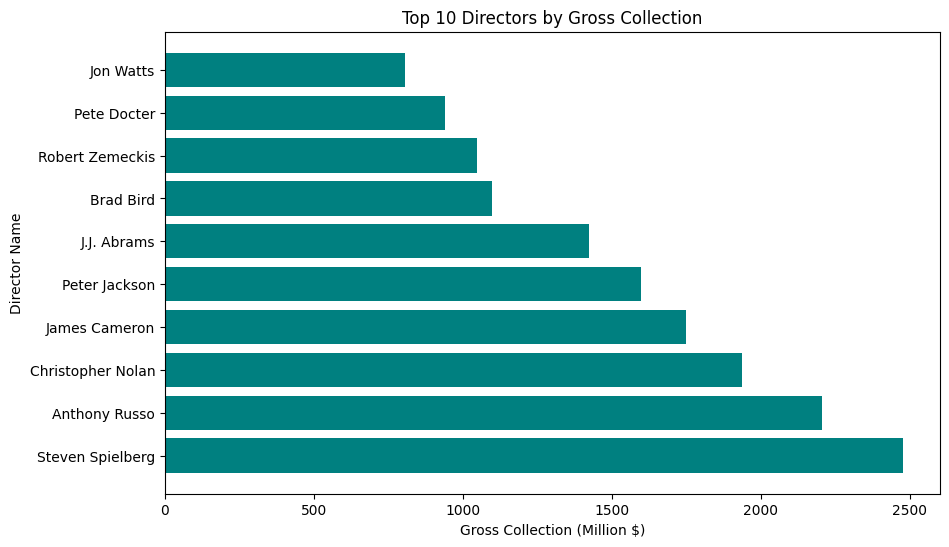

In [ ]:
# top directors by gross collection
top_directors_gross = df.groupby("Director")["Gross Collection (Million $)"].sum().nlargest(10)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_directors_gross.index, top_directors_gross.values, color='teal')
ax.set_title('Top 10 Directors by Gross Collection')
ax.set_xlabel('Gross Collection (Million $)')
ax.set_ylabel('Director Name')
plt.show()

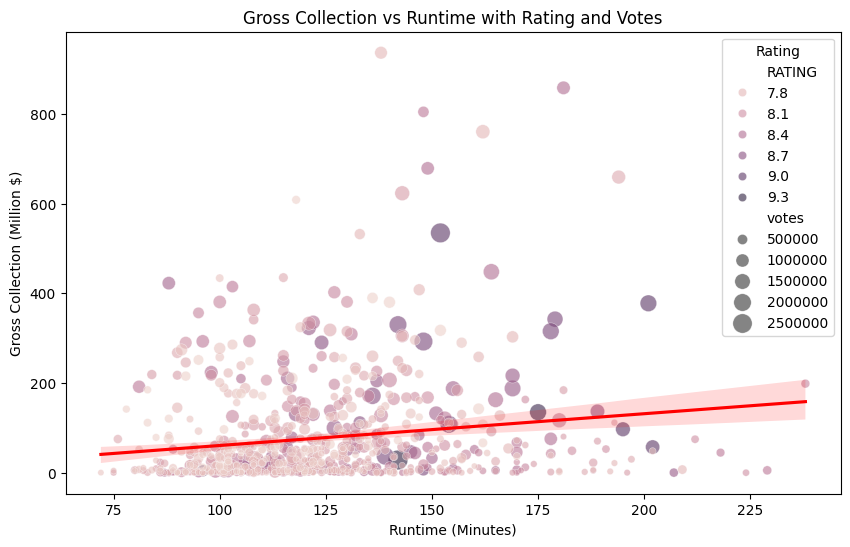

In [ ]:
# scatter plot of gross collection and rating vs runtime with added regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Runtime (Minutes)', y='Gross Collection (Million $)', hue='RATING', size='votes', sizes=(20, 200), alpha=0.6)
sns.regplot(data=df, x='Runtime (Minutes)', y='Gross Collection (Million $)', scatter=False, color='red')
plt.title('Gross Collection vs Runtime with Rating and Votes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Gross Collection (Million $)')
plt.legend(title='Rating')
plt.show()
